In [2]:
# Perform the initialization and imports
import sys
import pickle
import re
import os
import csv
import argparse
import math
import pprint

from string import ascii_lowercase
from collections import Counter, defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Bio import SeqIO, AlignIO, SeqUtils
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import IUPAC
from Bio.Seq import Seq

# Demand Python 3.
if sys.version_info[0] < 3:
    print("Python 3 is required, but you are using Python %i.%i.%i") % (
        sys.version_info[0], sys.version_info[1], sys.version_info[2])
    sys.exit(1)

1. Import PTE sequence with 9 nt buffer either side. A in ATG has index 9.
2. Set start and end position for extracting 10 nt windows
3. Create a list to store GC % values
4. Scan gene length with SeqUtils.GC to get GC% [returns float]
5. Plot line plot

In [4]:
pte = Seq("GGATCCTCCATGGGCGATCGGATCAATACCGTGCGCGGTCCTATCACAATCTCCGAGGCGGGTTTCACACTAACCCACGAGCACATCTGCGGCAGCTCGGCAGGATTCTTGCGTGCTTGGCCGGAGTTCTTCGGTAGCCGCAAAGCTCTAGCGGAAAAGGCTGTGAGAGGATTGCGCCGCGCCAGAGCGGCTGGCGTGCGAACGATTGTCGATGTGTCGACTTTCGATCTCGGTCGCGACGTTAGTTTATTGGCCGAGGTTTCGCGGGCTGCCGACGTTCATATCGTGGCGGCGACCGGCTTGTGGCTCGACCCGCCACTTTCGATGCGATTGAGGAGTGTAGAGGAACTCACACAGTTCTTCCTGCGTGAGATTCAATATGGCATCGAAGACACCGGAATTAGGGCGGGCATTATCAAGGTCGCGACCACAGGCAAGGTGACCCCCTTTCAGGAGTTAGTGTTAAGGGCAGCTGCCCGGGCCAGCTTGGCCACCGGTGTTCCGGTAACCACTCACACGGCAGCAAGTCAGCGCGGTGGTGAGCAACAAGCCGCCATTTTTGAATCCGAGGGCTTGAGCCCCTCACGGGTTTGTATTGGCCACAGCGATGATACTGACGATTTGAGCTATCTCACCGCCCTCGCTGCGCGCGGATACCTCATCGGTCTAGACCATATTCCGCACAGTGCGATTGGTCTAGAAGATAATGCGAGTGCATCAGCCCTCCTGGGTATTCGTTCGTGGCAAACACGGGCTCTCTTGATCAAGGCGCTCATCGACCAAGGCTACATGAAACAAATCCTCGTTTCGAATGACTGGCTGTTCGGGTTTTCGAGCTATGTCACCAACATCATGGACGTGATGGATAGCGTGAACCCCGACGGAATGGCCTTCATTCCACTGAGAGTGATCCCATTCCTACGAGAGAAGGGTATTCCACAGGAAACGCTGGCAGGCATCACTGTGACTAACCCGGCGCGGTTCTTGTCACCGACCTTGCGGGCGTCATGAAGCTTG", 
          'fasta')

Overal PTE GC content:

In [15]:
SeqUtils.GC(pte)

56.44051130776794

Each 11-nt interval contains the i-th nucleotide, 5 nt before and 5 after. Nucleotide 1 in ATG therefore includes pte[4:15] with i=9.

In [19]:
gc_var = [SeqUtils.GC(pte[i-5:i+6]) for i in range(9,1007)]

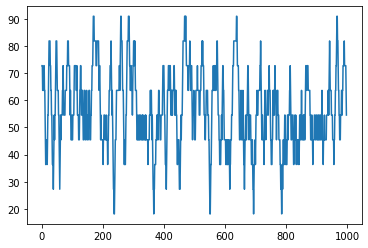

In [21]:
plt.plot(list(range(1,999)), gc_var)

In [18]:
len(pte)

1017

In [14]:
SeqUtils.GC(pte)

56.44051130776794